In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import itertools

In [32]:
# set datetime index
df = pd.read_csv("Sprint_Resampled Data.csv")
df['Date'] = df['Date'].apply(pd.to_datetime)
df = df.set_index('Date')
df.columns
df = df["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"]
df = df.dropna()
df = df['1991' : '2019']

In [33]:
train = df[:int(0.9*(len(df)))]
valid = df[int(0.9*(len(df))):]
order = (1,2,1)
seasonal_order = (1,1,1,12)
model = SARIMAX(train,order = order, seasonal_order=seasonal_order,trend = 'n')
# fit model
model_fit = model.fit()
# one step forecast
# Model[[(0, 0, 0), (1, 0, 1, 0), 'n']] 5.253

/home/yuntong/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [34]:
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1])
yhat

2016-10-31    44.360409
2016-11-30    42.764748
2016-12-31    40.535066
2017-01-31    39.910054
2017-02-28    39.929718
2017-03-31    42.417422
2017-04-30    43.834748
2017-05-31    44.774492
2017-06-30    45.454701
2017-07-31    45.296979
2017-08-31    44.626755
2017-09-30    44.105511
2017-10-31    42.825150
2017-11-30    41.308963
2017-12-31    39.309432
2018-01-31    39.118504
2018-02-28    39.250341
2018-03-31    41.273237
2018-04-30    42.507189
2018-05-31    42.957630
2018-06-30    43.495921
2018-07-31    43.701275
2018-08-31    42.948343
2018-09-30    42.321958
2018-10-31    40.985965
2018-11-30    39.465263
2018-12-31    37.475539
2019-01-31    37.313798
2019-02-28    37.444231
2019-03-31    39.410889
2019-04-30    40.615348
2019-05-31    41.007222
2019-06-30    41.519960
2019-07-31    41.747754
2019-08-31    40.974897
Freq: M, dtype: float64

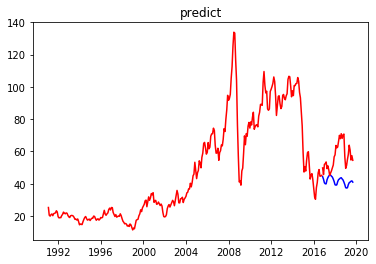

In [35]:
plt.plot(yhat, color = 'blue', label = 'yhat')
plt.plot(valid, color = 'red', label = 'valid')
plt.plot(train,color = 'red')
plt.title('predict')
plt.show()